In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic Acid']
df

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


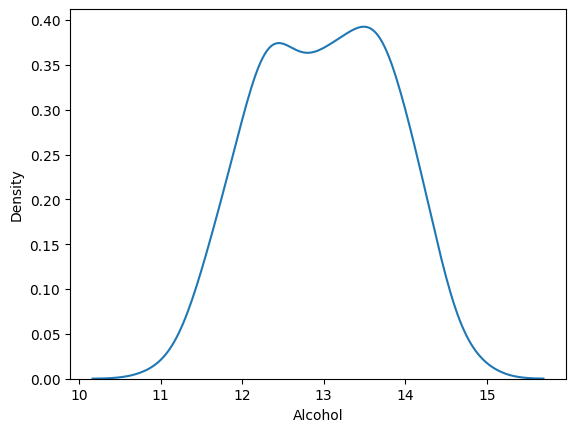

In [8]:
sns.kdeplot(df['Alcohol'])
plt.show()

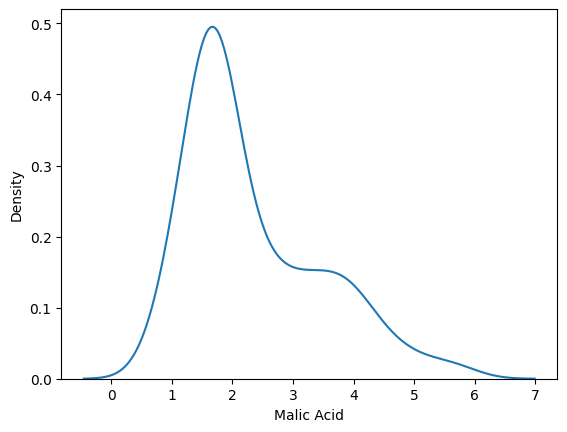

In [10]:
sns.kdeplot(df['Malic Acid'])
plt.show()

In [17]:
x=df.drop(columns=['Class label'])
y=df['Class label']
x

,Alcohol,Malic Acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled


,Alcohol,Malic Acid
0,0.871053,0.160896
1,0.394737,0.940937
2,0.352632,0.036660
3,0.644737,0.158859
4,0.536842,0.124236
...,...,...
137,0.744737,0.126273
138,0.321053,0.171079
139,0.881579,0.199593
140,0.436842,0.130346


In [18]:
np.round(x_train.describe(),1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,13.0,1.9
75%,13.7,3.1
max,14.8,5.8


In [19]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


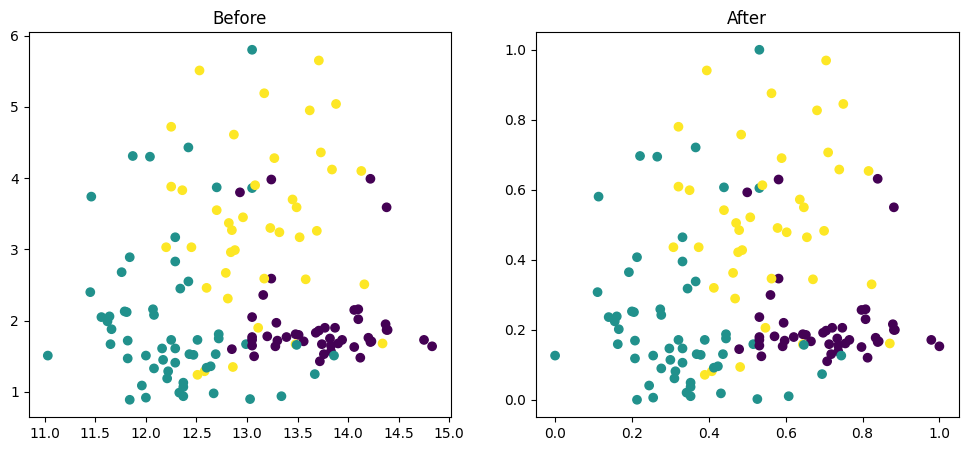

In [25]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic Acid'],c=y_train)
ax1.set_title("Before")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After")
plt.show()

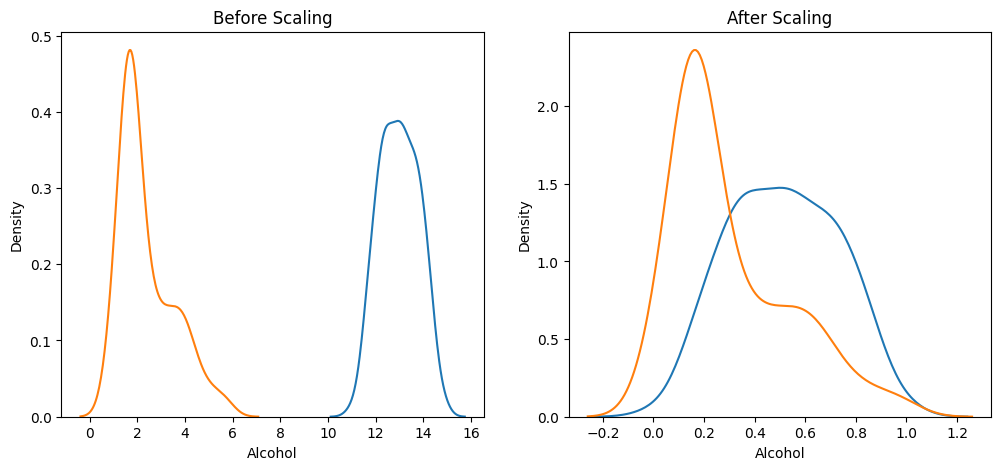

In [27]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic Acid'],ax=ax1)

# after scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'],ax=ax2)
plt.show()

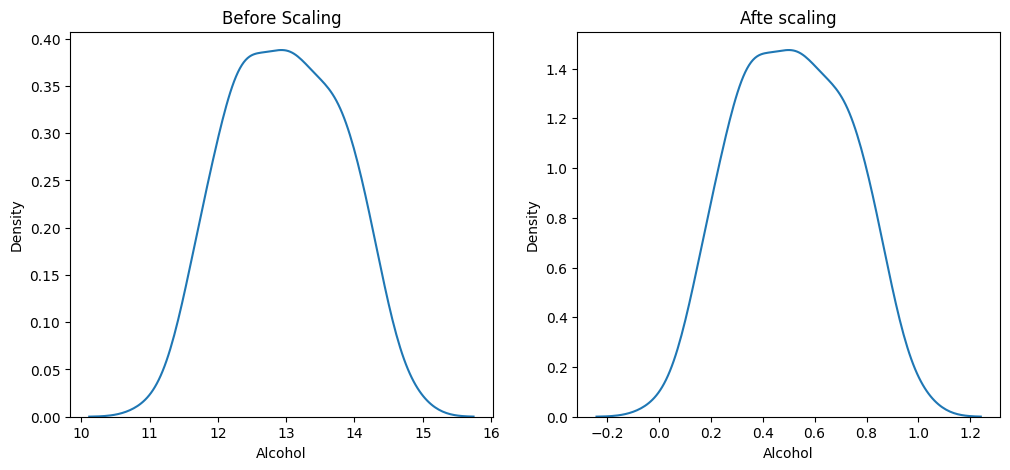

In [28]:
# Comparision Distribution
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# before
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)

# Afte scaling
ax2.set_title("Afte scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
plt.show()

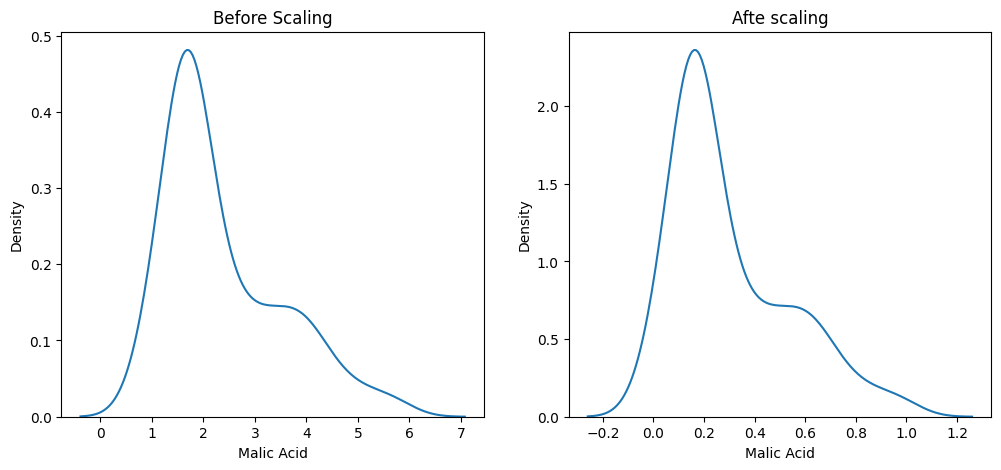

In [30]:
# Comparision Distribution
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# before
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Malic Acid'],ax=ax1)

# Afte scaling
ax2.set_title("Afte scaling")
sns.kdeplot(x_train_scaled['Malic Acid'],ax=ax2)
plt.show()